# WORD2VEC USING SKLEARN
Word2vec is a two-layer neural net that processes text. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus.

### iMPORTS 


In [20]:
#NECESSARY imports

import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#location of the file(since inside the same folder -we can use the name of the file)
stopword_file ='long_stopwords'

In [6]:
#creates an empty list for stop words
stop_words = []

#creates a list of stop words
with open(stopword_file,'r') as inpFile:
    lines = inpFile.readlines()
    stop_words_temp = map(lambda x : re.sub('\n','',x),lines)
    stop_words = list(map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp))


### PREPROCESSING

In [7]:
#removes extra spaces ,converst to lower case
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [10]:
#PROCESSEED TEXT
line_count = 0
sentences = []

with open('dataset','r') as inpFile:
    x = inpFile.readlines()
    for line in x:
         if line is not None or line != '\n':
            words = line.split()
            words = map(lambda x: clean(x), words)
            words = list(filter(lambda x:True if len(x) > 0 else False, words))
            sentences.append(words)
            

In [11]:
#SAMPLE EXAMPLE
sentences[100:110]

[['anbarivan', 'nl'],
 [],
 ['ii'],
 [],
 [],
 ['contents'],
 [],
 ['contents', 'iv'],
 [],
 ['list', 'figures', 'ix']]

### CODE TO CONVERT WORDS TO VECTORS

In [12]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [13]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)


/home/anjali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


### TSNE dimensionality reduction model for representation

In [14]:
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [15]:
new_values = tsne_model.fit_transform(tokens)

In [16]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

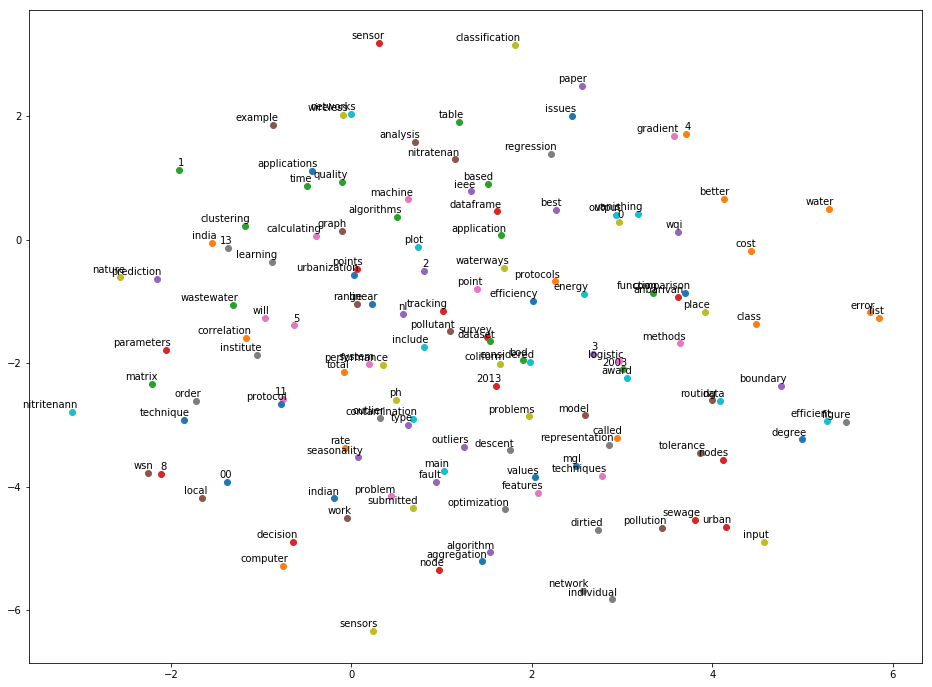

In [22]:
plt.figure(figsize=(16, 12)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

### most_similar() function that lets you find words semantically close to a given word

In [23]:
model.most_similar(positive=['prediction','classification'],negative=['sensor'])

/home/anjali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('points', 0.08208037912845612),
 ('award', 0.0638788491487503),
 ('output', 0.0628371387720108),
 ('wqi', 0.06063992530107498),
 ('based', 0.05790457874536514),
 ('best', 0.05479947105050087),
 ('total', 0.051304806023836136),
 ('nature', 0.05016964673995972),
 ('list', 0.04629909247159958),
 ('graph', 0.045990973711013794)]

In [24]:
model.most_similar(positive=['water','pollution'],negative=['time'])

/home/anjali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('main', 0.12288278341293335),
 ('example', 0.11392807215452194),
 ('dirtied', 0.10246878862380981),
 ('called', 0.10103512555360794),
 ('degree', 0.09975720196962357),
 ('2013', 0.09896506369113922),
 ('protocols', 0.09456238895654678),
 ('pollutant', 0.09354311227798462),
 ('networks', 0.08926627784967422),
 ('efficiency', 0.08743125200271606)]

In [28]:
model.most_similar(positive=['sensor','nodes'],negative=['matrix'])

/home/abu/gpu/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('performance', 0.15946906805038452),
 ('india', 0.14322598278522491),
 ('calculating', 0.14193421602249146),
 ('networks', 0.13908149302005768),
 ('decision', 0.13620352745056152),
 ('pollutant', 0.13387750089168549),
 ('protocol', 0.13113047182559967),
 ('machine', 0.12514598667621613),
 ('wsn', 0.11453018337488174),
 ('indian', 0.1135537326335907)]